<a href="https://colab.research.google.com/github/stevengregori92/DimensionalityReduction/blob/main/Higher_Dimension_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#t-Distributed Stochastic Neighbor Embedding

In [2]:
points = np.array([
    [0,0,0], [0,0,1],
    [0,1,0], [0,1,1],
    [1,0,0], [1,0,1],
    [1,1,0], [1,1,1]
])

labels = np.array(range(8))

In [3]:
tsne = TSNE(2, perplexity=5, random_state=42)
points_tsne = tsne.fit_transform(points)

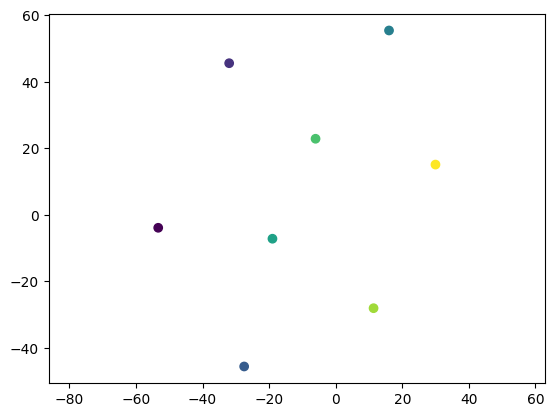

In [4]:
plt.scatter(points_tsne[:, 0], points_tsne[:, 1], c= labels)
plt.axis('equal');

#Import Data

In [5]:
!gdown https://drive.google.com/uc?id=13HP6N9TAp5fLC7dPIEDyjHEgYZgtlqMN

Downloading...
From: https://drive.google.com/uc?id=13HP6N9TAp5fLC7dPIEDyjHEgYZgtlqMN
To: /content/dataaaa.zip
100% 24.9M/24.9M [00:00<00:00, 55.3MB/s]


In [6]:
!unzip /content/dataaaa.zip

Archive:  /content/dataaaa.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/lfw_people.csv     
  inflating: data/small_fmnist.csv   
  inflating: data/breast_cancer.csv  
  inflating: data/kompas.csv         
  inflating: __MACOSX/data/._kompas.csv  
   creating: data/sample_faces/
  inflating: data/sample_faces/.DS_Store  
   creating: __MACOSX/data/sample_faces/
  inflating: __MACOSX/data/sample_faces/._.DS_Store  
  inflating: data/sample_faces/hatta.png  
  inflating: data/sample_faces/soekarno2.png  
  inflating: data/sample_faces/soekarno1.png  


In [7]:
df = pd.read_csv('data/small_fmnist.csv')
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,164,177,163,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,40,...,125,93,87,49,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,154,118,66,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
label2cat = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

#Dataset Splitting

In [9]:
X = df.drop(columns=['label'])
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 784), (1000, 784), (4000,), (1000,))

#Visualization with tSNE

In [10]:
tsne = TSNE(2, perplexity = 150, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

Text(0, 0.5, 'TSNE 2')

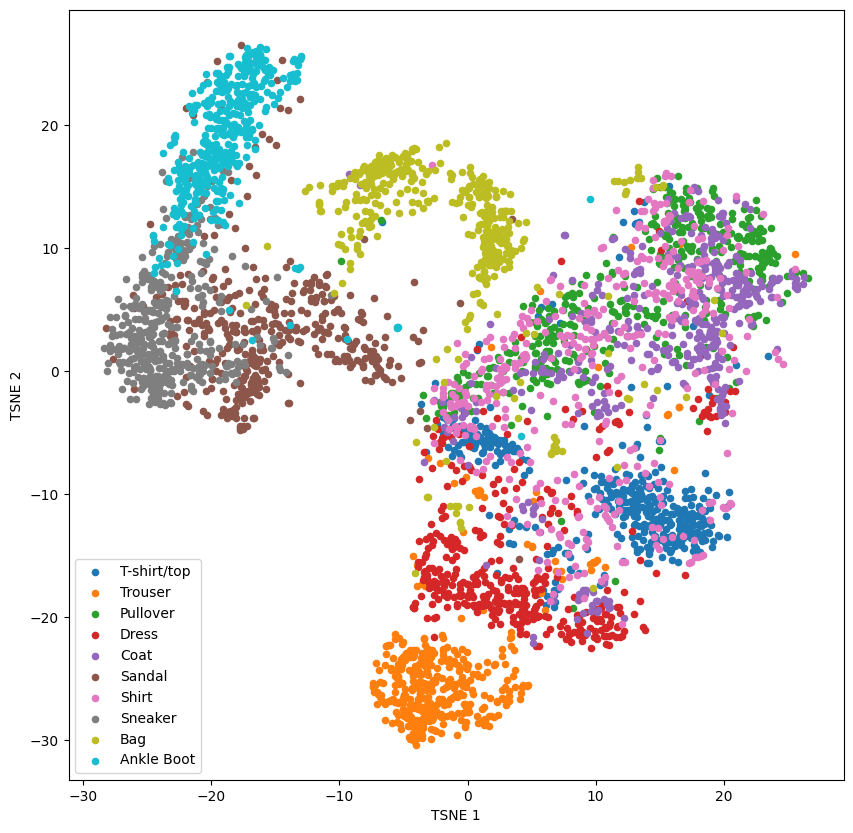

In [11]:
plt.figure(figsize=(10,10))
for i  in range(10):
  mask = y_train ==i
  plt.scatter(X_train_tsne[mask,0], X_train_tsne[mask, 1], s=20, label = label2cat[i])
plt.legend()
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')